In [21]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("twcs.csv")

In [3]:
data.head(2)
# We'll be using created at feature to analyse data

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0


In [6]:
data['hour'] = pd.DatetimeIndex(data['created_at']).hour
data['date'] = pd.DatetimeIndex(data['created_at']).date
data['count'] = 1
data_filtered = data[['hour', 'date', 'count']]
data_filtered.head(5)

,hour,date,count
0,22,2017-10-31,1
1,22,2017-10-31,1
2,22,2017-10-31,1
3,21,2017-10-31,1
4,21,2017-10-31,1


In [13]:
df_tweets_hourly = data_filtered.groupby(["hour"]).sum().reset_index()
df_tweets_hourly.head(2)
# We have 113298 tweets for oth hour

,hour,count
0,0,113298
1,1,107779


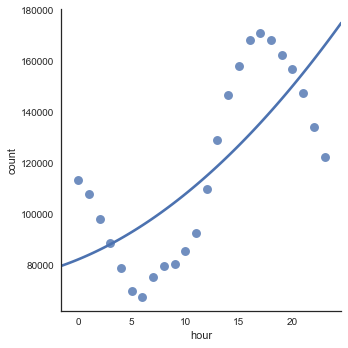

In [26]:
# Lets plot hor vs count
sns.set(style="white")
sns.lmplot(x="hour", y="count",order=2, ci=None, scatter_kws={"s": 80}, data=df_tweets_hourly)
# No of tweets being posted have this good sinosoidal trend 

In [50]:
data_filtered.to_csv('tableau.csv', index=False)
# Save for a tableau viz

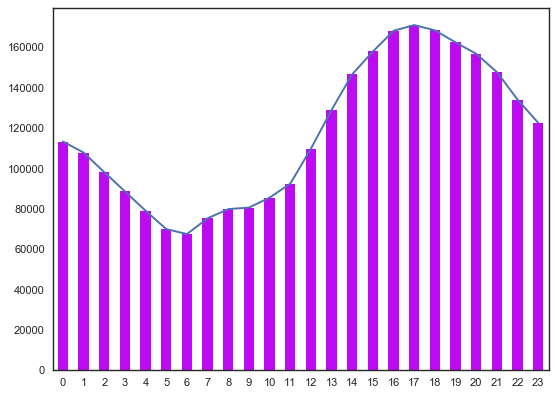

In [57]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
df_tweets_hourly["count"].plot.bar(color='#BC0AF3')
df_tweets_hourly["count"].plot()
plt.show()
# This is also a good way to visualize tweets/hour